<a href="https://colab.research.google.com/github/awasthi/MYASG/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Patient Health Records to Identify Factors Influencing Hospital Readmission Rates

## Project Overview
Hospital readmissions are a significant concern in healthcare, impacting patient outcomes and
increasing healthcare costs. This project aims to analyse a diverse dataset of patient health
records to identify factors that contribute to hospital readmissions. By leveraging Python's data
analysis and visualization capabilities, we will uncover patterns and relationships between
patient demographics, medical history, treatment plans, and readmission rates.

1. Load the data into a Python environment using pandas

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd

# Load main data file
url = "https://raw.githubusercontent.com/awasthi/MYASG/main/"
df = pd.read_csv(url+'diabetic_data.csv')  # Adjust filename

# If there are mapping files (e.g. admission type id → name), load them
admission_mapping = pd.read_csv(url+'admission_type_mapping.csv')  # If applicable
admission_source_mapping = pd.read_csv(url+'admission_source_mapping.csv')  # If applicable
discharge_mapping = pd.read_csv(url+'discharge_disposition_mapping.csv')  # If applicable

2. Handle missing or inconsistent data entries, particularly in categorical variables like 'Race' and 'Gender'.

In [4]:
# Show missing values per column
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

#unique data
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

# changed on basis of above:
df.replace('?', pd.NA, inplace=True)

# Standardize categorical variables
df['race'] = df['race'].replace('?', pd.NA)
df['gender'] = df['gender'].replace('Unknown/Invalid', pd.NA)

# Drop rows with missing race or gender
df.dropna(subset=['race', 'gender'], inplace=True)




max_glu_serum    96420
A1Cresult        84748
dtype: int64
race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatr

In [ ]:
# Fill missing race/gender with 'Unknown'
# Step 1: Add the new category
df['race'] = df['race'].cat.add_categories('Unknown')

# Step 2: Now fill missing values safely
df['race'] = df['race'].fillna('Unknown')

df['gender'] = df['gender'].cat.add_categories('Unknown')
df['gender'] = df['gender'].fillna('Unknown')

# Optionally drop columns with too many missing values
threshold = 0.5  # Drop columns with more than 50% missing
df.dropna(thresh=int(df.shape[0] * (1 - threshold)), axis=1, inplace=True)

# Fill others with 'Missing' as a label
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Missing')


In [ ]:
# Convert gender, race, age into categorical types
categorical_cols = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id']
df[categorical_cols] = df[categorical_cols].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99492 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99492 non-null  int64   
 1   patient_nbr               99492 non-null  int64   
 2   race                      99492 non-null  category
 3   gender                    99492 non-null  category
 4   age                       99492 non-null  category
 5   weight                    3059 non-null   object  
 6   admission_type_id         99492 non-null  category
 7   discharge_disposition_id  99492 non-null  category
 8   admission_source_id       99492 non-null  int64   
 9   time_in_hospital          99492 non-null  int64   
 10  payer_code                59781 non-null  object  
 11  medical_specialty         50726 non-null  object  
 12  num_lab_procedures        99492 non-null  int64   
 13  num_procedures            99492 non-null  int64   

4. Create a binary variable for readmission (e.g., 1 for readmitted within 30 days, 0 otherwise).


In [ ]:
# Create binary readmission column
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(df['readmitted_binary'].value_counts())


readmitted_binary
0    88323
1    11169
Name: count, dtype: int64


5. Demographic Analysis:

- Analyze the distribution of patients across different age groups, genders, and
races.

- Examine the relationship between demographics and readmission rates.

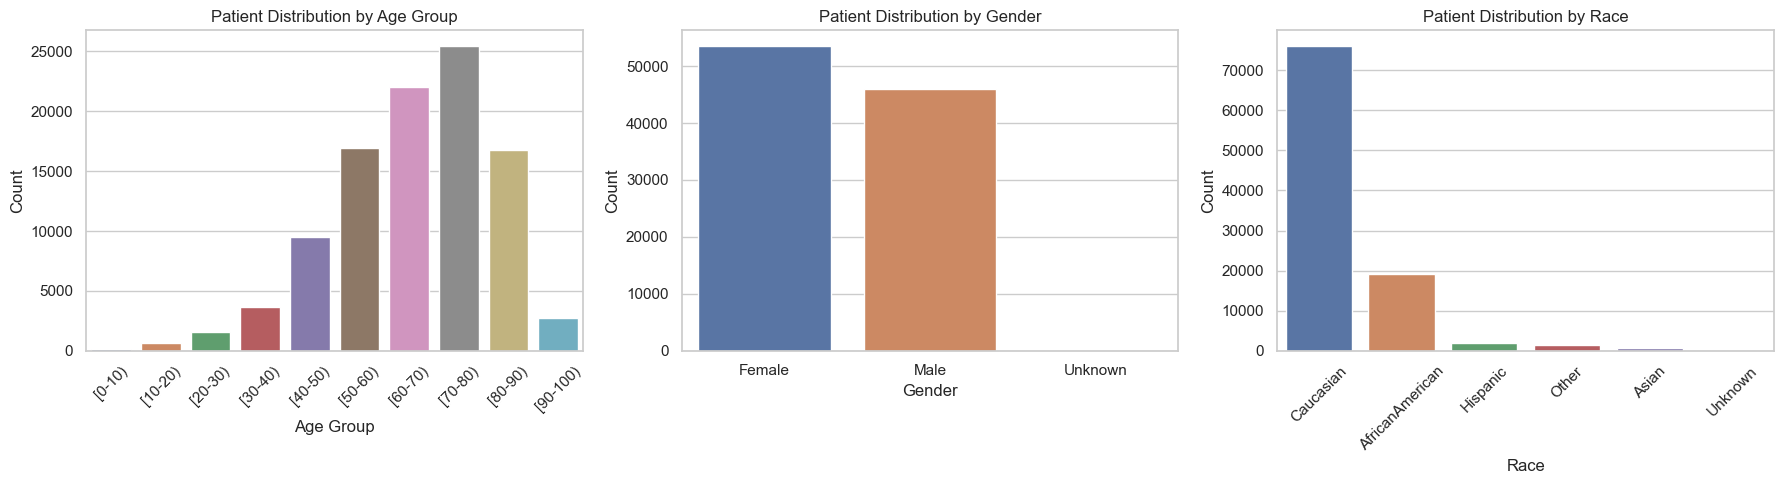

In [ ]:



# Set up a common style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# 1. Age Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()))
plt.xticks(rotation=45)
plt.title("Patient Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

# 2. Gender Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='gender')
plt.title("Patient Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# 3. Race Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='race', order=df['race'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Patient Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

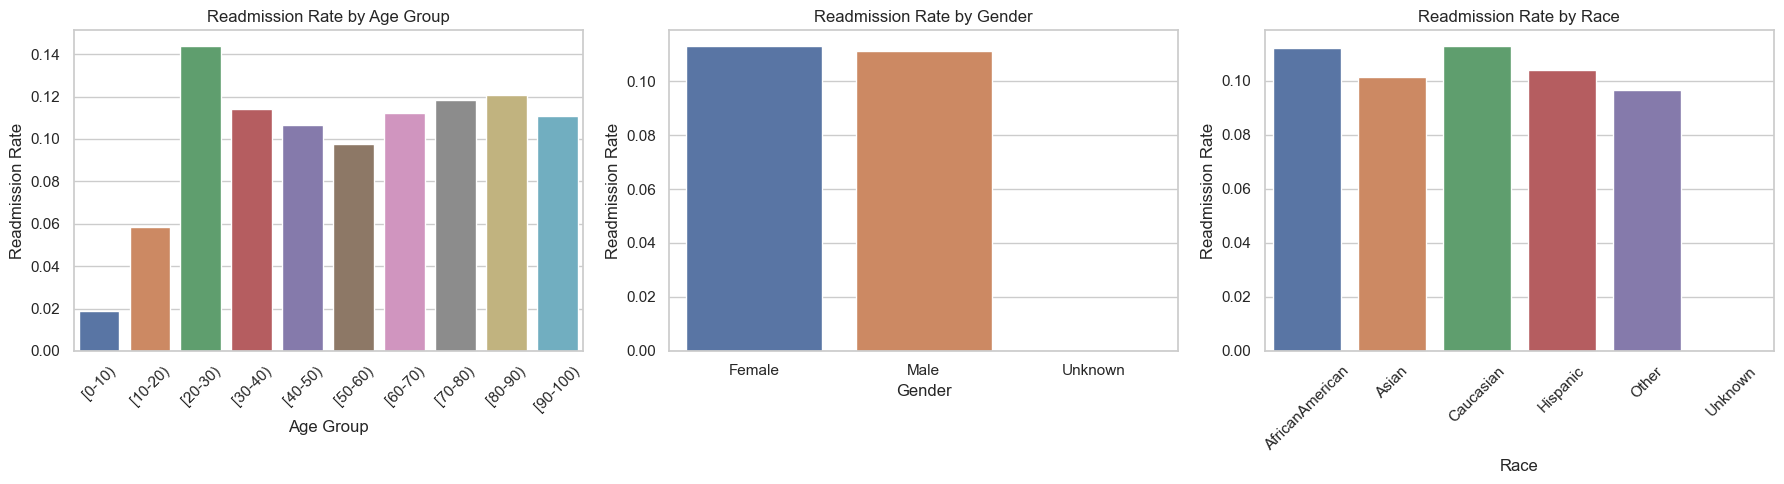

In [ ]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# 1. Readmission Rate by Age
plt.subplot(1, 3, 1)
age_readmit = df.groupby('age')['readmitted_binary'].mean().reindex(sorted(df['age'].unique()))
sns.barplot(x=age_readmit.index, y=age_readmit.values)
plt.title("Readmission Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Readmission Rate")
plt.xticks(rotation=45)

# 2. Readmission Rate by Gender
plt.subplot(1, 3, 2)
gender_readmit = df.groupby('gender')['readmitted_binary'].mean()
sns.barplot(x=gender_readmit.index, y=gender_readmit.values)
plt.title("Readmission Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Readmission Rate")

# 3. Readmission Rate by Race
plt.subplot(1, 3, 3)
race_readmit = df.groupby('race')['readmitted_binary'].mean().sort_values(ascending=False)
sns.barplot(x=race_readmit.index, y=race_readmit.values)
plt.title("Readmission Rate by Race")
plt.xlabel("Race")
plt.ylabel("Readmission Rate")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

6. Clinical Analysis:

- Investigate the impact of the number of lab procedures, medications, and diagnoses on readmission.
- Analyze the effect of specific treatments or medication changes on patient outcomes.

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


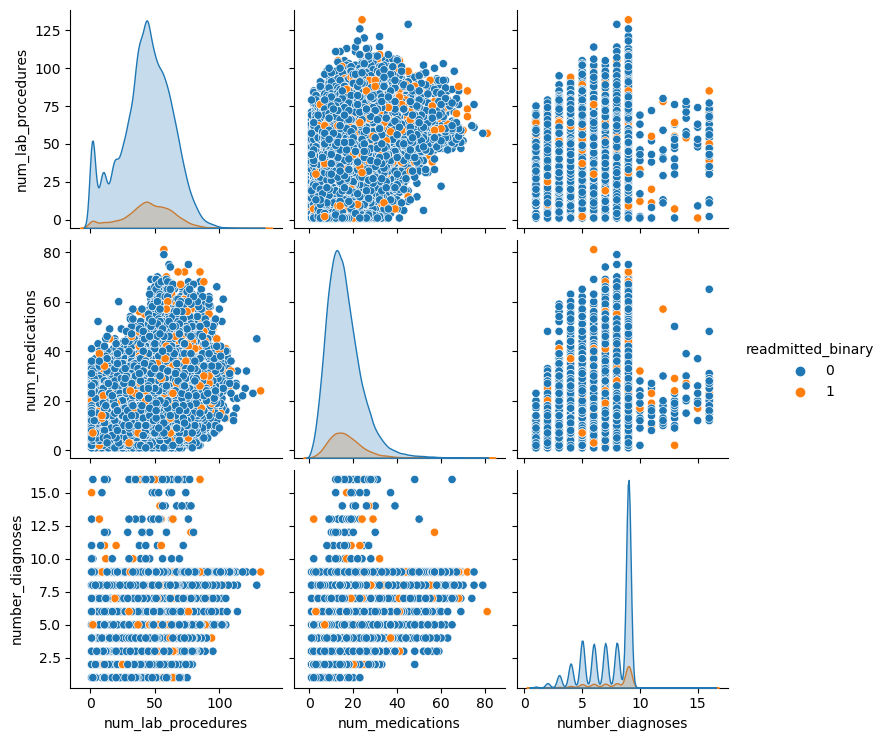

In [ ]:
# Correlation of lab procedures, medications, diagnoses
import seaborn as sns
import matplotlib.pyplot as plt

clinical_vars = ['num_lab_procedures', 'num_medications', 'number_diagnoses']
sns.pairplot(df[clinical_vars + ['readmitted_binary']], hue='readmitted_binary')

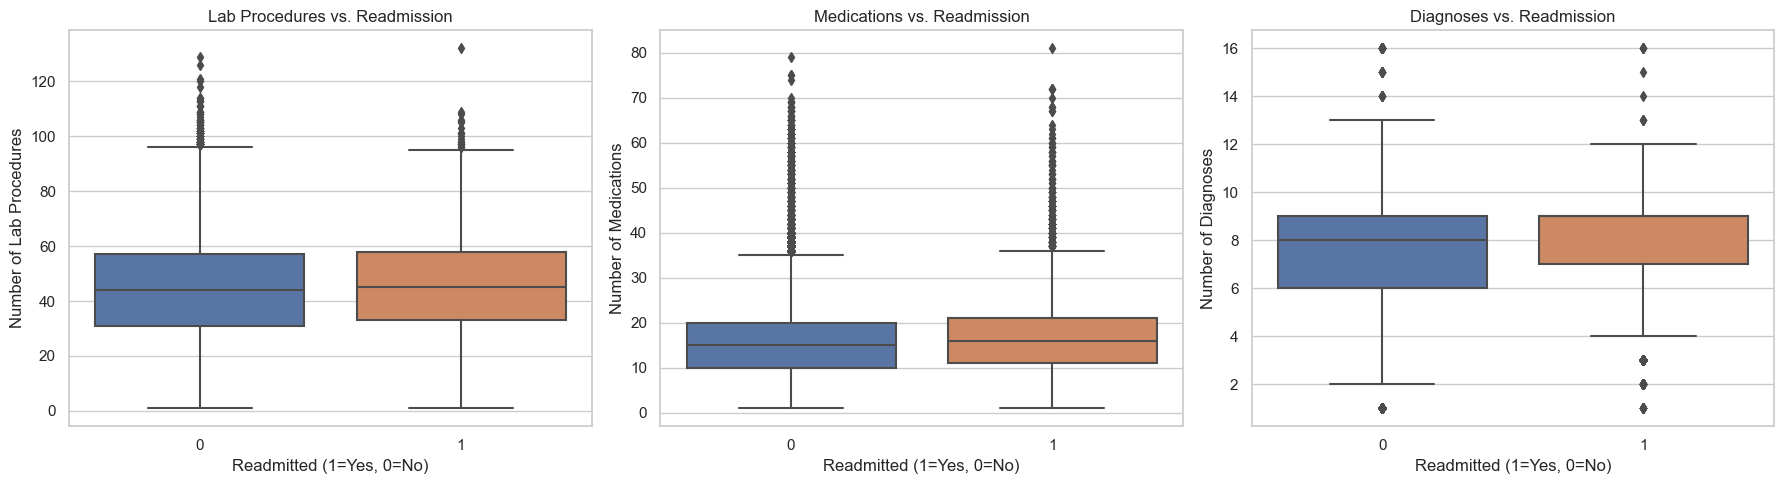

In [ ]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# 1. Lab Procedures
plt.subplot(1, 3, 1)
sns.boxplot(x='readmitted_binary', y='num_lab_procedures', data=df)
plt.title("Lab Procedures vs. Readmission")
plt.xlabel("Readmitted (1=Yes, 0=No)")
plt.ylabel("Number of Lab Procedures")

# 2. Medications
plt.subplot(1, 3, 2)
sns.boxplot(x='readmitted_binary', y='num_medications', data=df)
plt.title("Medications vs. Readmission")
plt.xlabel("Readmitted (1=Yes, 0=No)")
plt.ylabel("Number of Medications")

# 3. Diagnoses
plt.subplot(1, 3, 3)
sns.boxplot(x='readmitted_binary', y='number_diagnoses', data=df)
plt.title("Diagnoses vs. Readmission")
plt.xlabel("Readmitted (1=Yes, 0=No)")
plt.ylabel("Number of Diagnoses")

plt.tight_layout()
plt.show()

In [ ]:
df[['num_lab_procedures', 'num_medications', 'number_diagnoses', 'readmitted_binary']].corr()


,num_lab_procedures,num_medications,number_diagnoses,readmitted_binary
num_lab_procedures,1.000000,0.267013,0.151565,0.020482
num_medications,0.267013,1.000000,0.258623,0.039476
number_diagnoses,0.151565,0.258623,1.000000,0.049625
readmitted_binary,0.020482,0.039476,0.049625,1.000000


In [ ]:
# Medication vs. Readmission Rate
# We’ll group by each medication column and compute how often patients are readmitted.
# Choose key treatment columns
medications = ['insulin', 'metformin', 'glipizide', 'glyburide', 'glimepiride']

# Print readmission rate per medication type
for med in medications:
    print(f"\n--- {med.upper()} ---")
    print(df.groupby(med)['readmitted_binary'].mean())



--- INSULIN ---
insulin
Down      0.140045
No        0.100871
Steady    0.111799
Up        0.131151
Name: readmitted_binary, dtype: float64

--- METFORMIN ---
metformin
Down      0.120996
No        0.115880
Steady    0.097545
Up        0.082772
Name: readmitted_binary, dtype: float64

--- GLIPIZIDE ---
glipizide
Down      0.154412
No        0.111800
Steady    0.112512
Up        0.131300
Name: readmitted_binary, dtype: float64

--- GLYBURIDE ---
glyburide
Down      0.095238
No        0.112868
Steady    0.107755
Up        0.107053
Name: readmitted_binary, dtype: float64

--- GLIMEPIRIDE ---
glimepiride
Down      0.129032
No        0.112812
Steady    0.100287
Up        0.109034
Name: readmitted_binary, dtype: float64


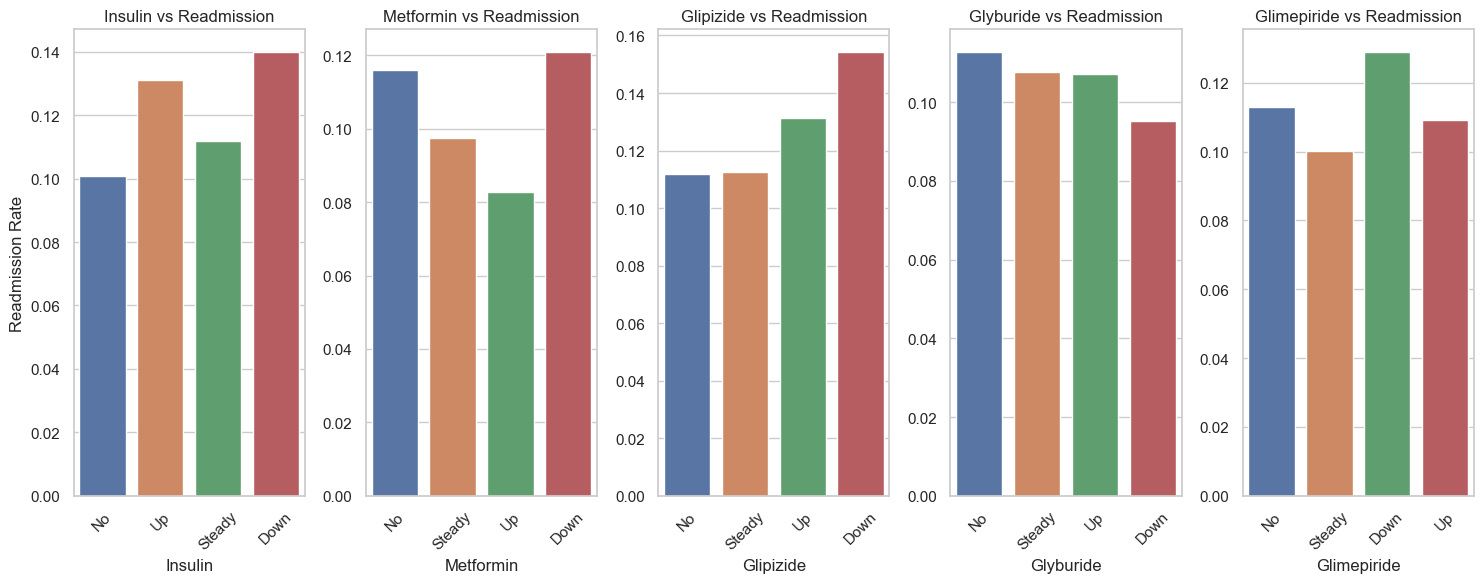

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# Create a bar plot for each medication
for i, med in enumerate(medications, 1):
    plt.subplot(1, len(medications), i)
    sns.barplot(data=df, x=med, y='readmitted_binary', ci=None)
    plt.title(f"{med.capitalize()} vs Readmission")
    plt.ylabel("Readmission Rate" if i == 1 else "")
    plt.xlabel(med.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


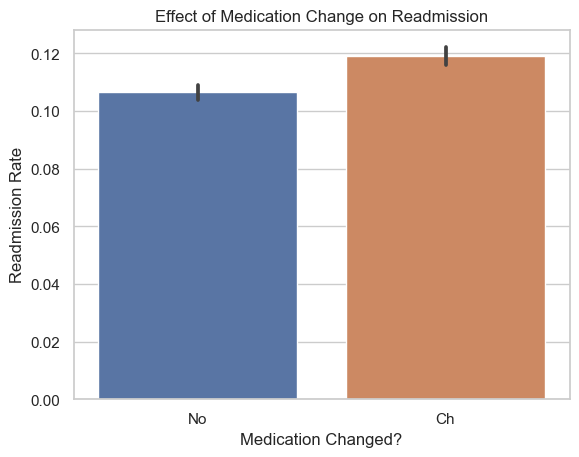

In [ ]:
# Distribution of readmission based on whether medication changed
sns.barplot(data=df, x='change', y='readmitted_binary')
plt.title("Effect of Medication Change on Readmission")
plt.xlabel("Medication Changed?")
plt.ylabel("Readmission Rate")
plt.show()

Admission Analysis:
- Assess how admission types and discharge dispositions correlate with
readmission rates.
- Evaluate the length of hospital stay in relation to readmission.

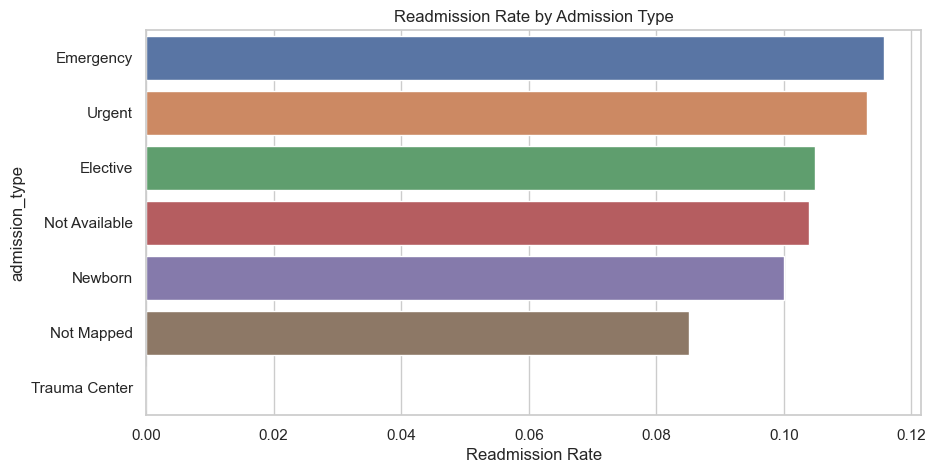

In [ ]:
# Admission type vs readmission rate
admission_rates = df.groupby('admission_type')['readmitted_binary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=admission_rates.values, y=admission_rates.index)
plt.xlabel("Readmission Rate")
plt.title("Readmission Rate by Admission Type")
plt.show()


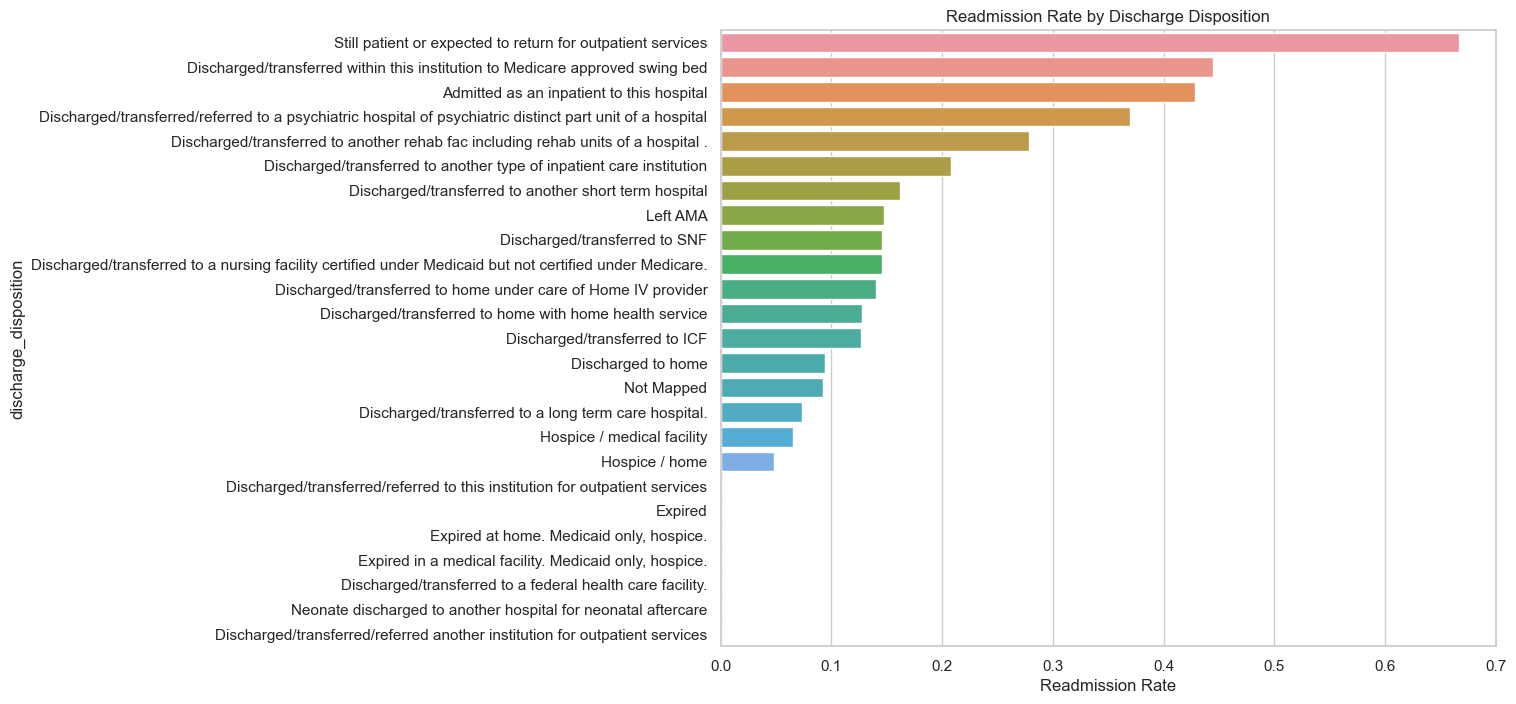

In [ ]:
# Discharge disposition vs readmission rate
discharge_rates = df.groupby('discharge_disposition')['readmitted_binary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=discharge_rates.values, y=discharge_rates.index)
plt.xlabel("Readmission Rate")
plt.title("Readmission Rate by Discharge Disposition")
plt.show()


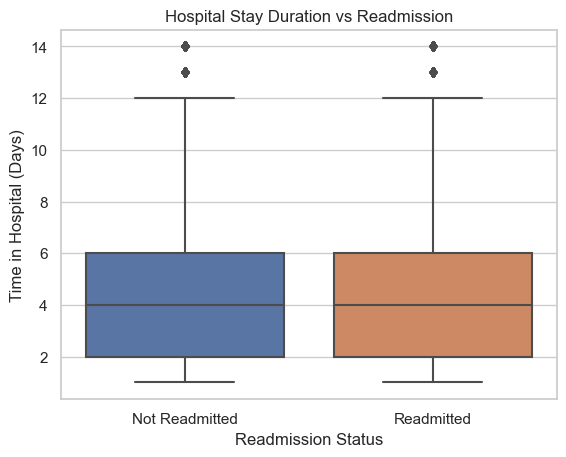

In [ ]:
sns.boxplot(data=df, x='readmitted_binary', y='time_in_hospital')
plt.xticks([0, 1], ["Not Readmitted", "Readmitted"])
plt.xlabel("Readmission Status")
plt.ylabel("Time in Hospital (Days)")
plt.title("Hospital Stay Duration vs Readmission")
plt.show()


Data Visualization:
- Visualize distributions of demographic and clinical variables.
- Develop plots to compare numerical variables across readmission statuses.
- Display correlations between various factors and readmission rates.
- Generate plots to identify potential patterns or outliers in the data.

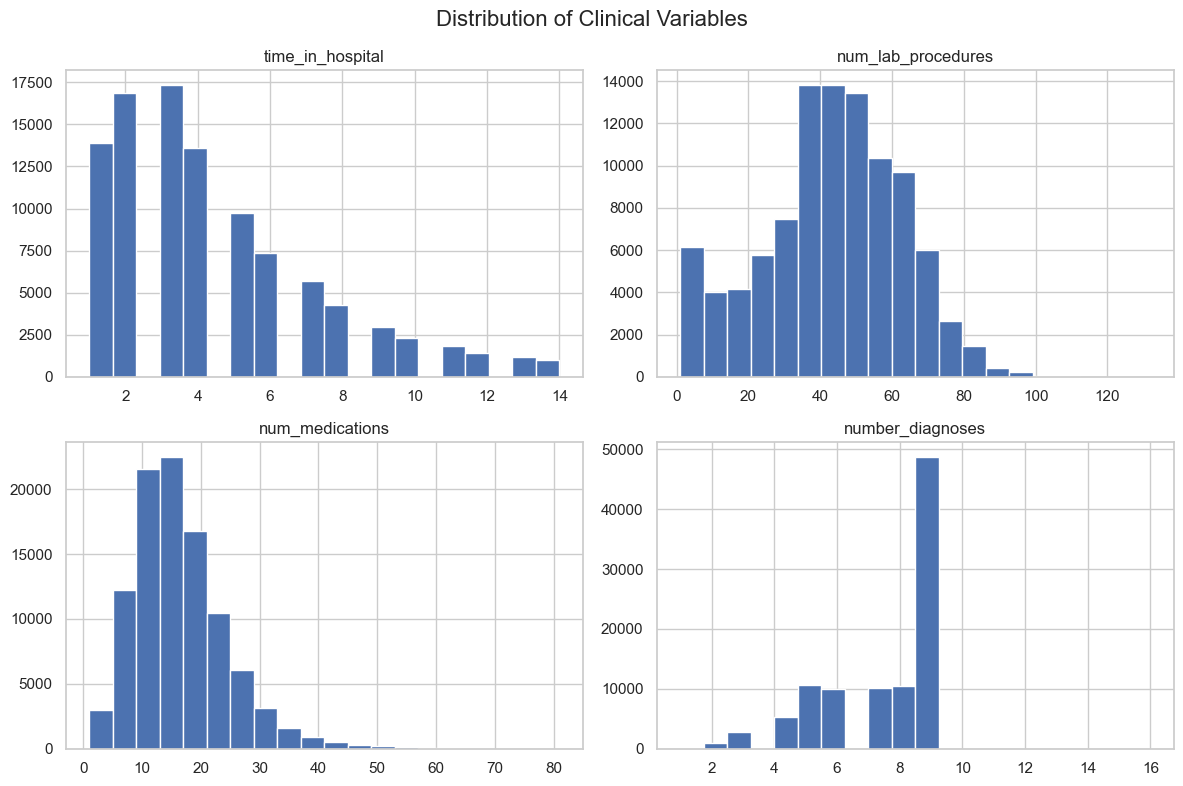

In [ ]:
# demographic already done before.

clinical_vars = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
df[clinical_vars].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Clinical Variables", fontsize=16)
plt.tight_layout()
plt.show()


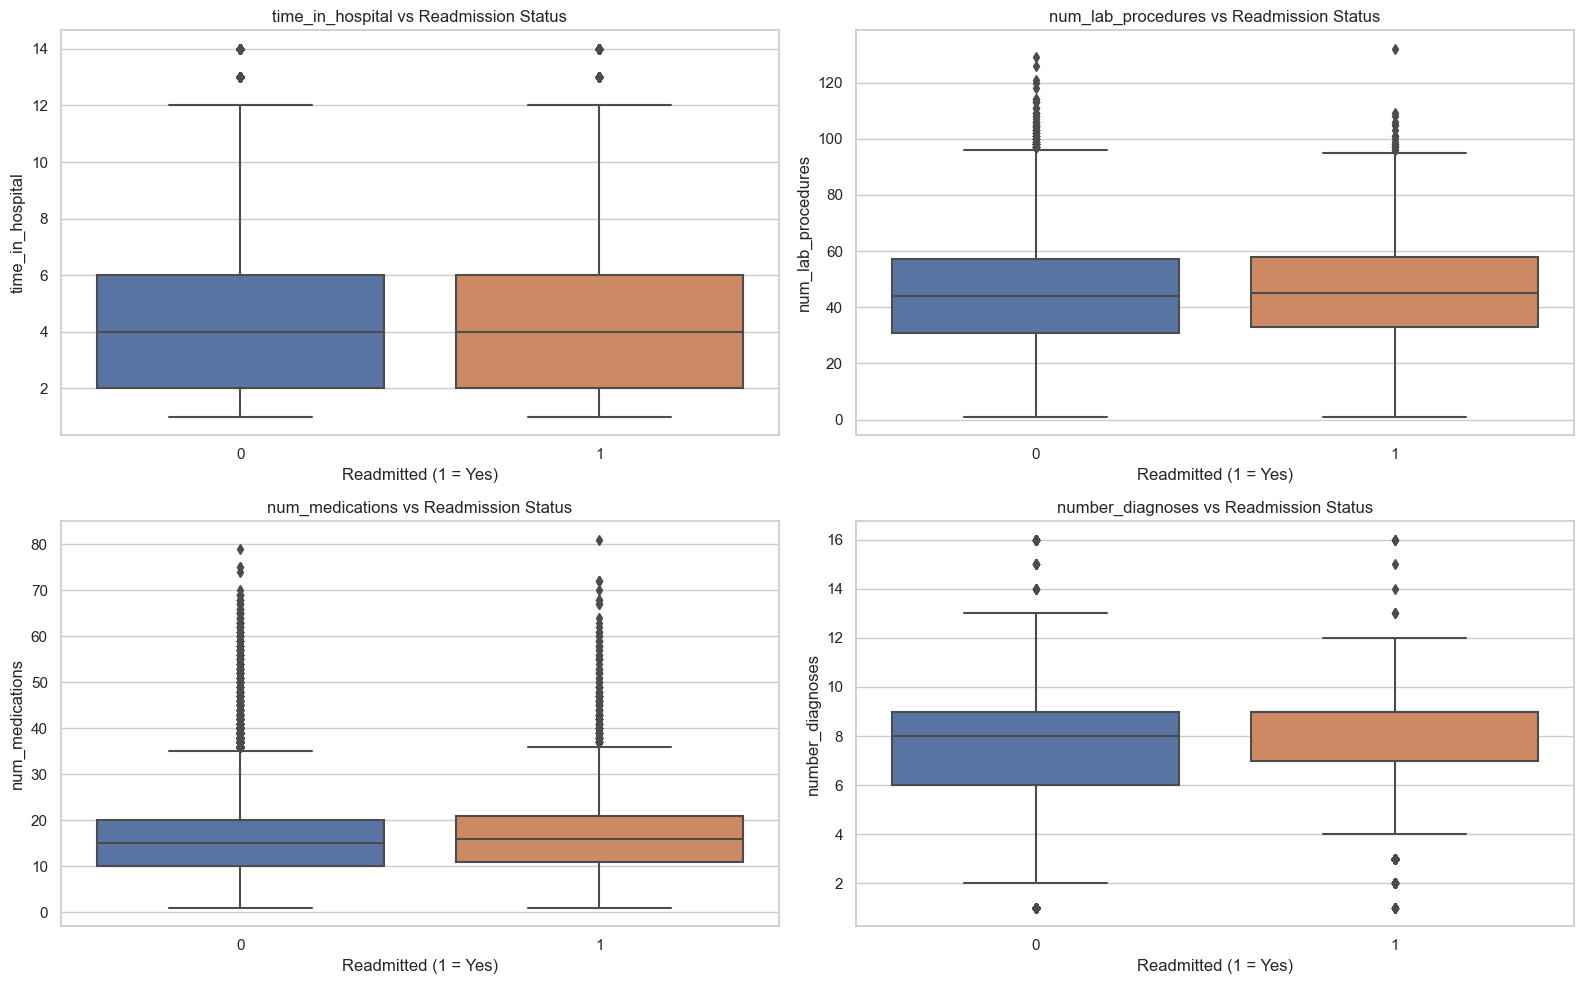

In [ ]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(clinical_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='readmitted_binary', y=col)
    plt.title(f"{col} vs Readmission Status")
    plt.xlabel("Readmitted (1 = Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


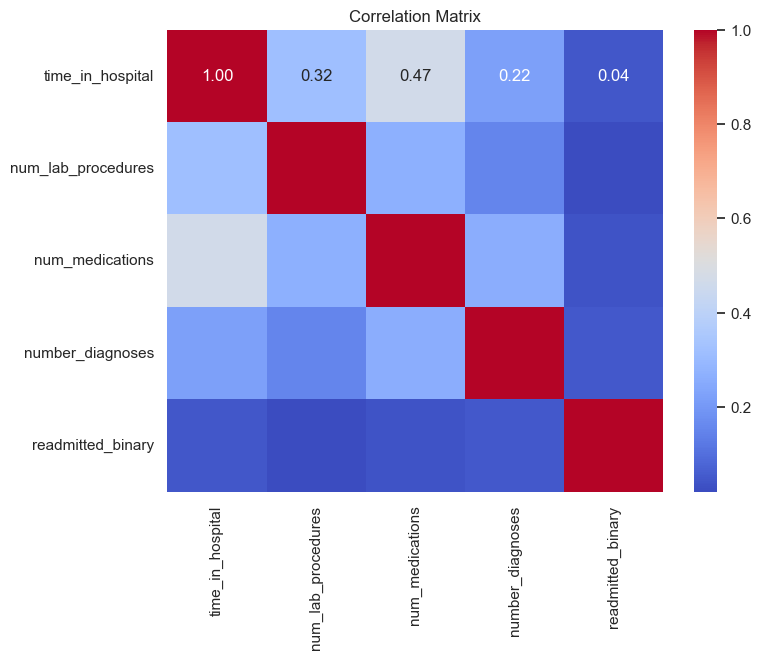

In [ ]:
# Compute correlations
correlation = df[clinical_vars + ['readmitted_binary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


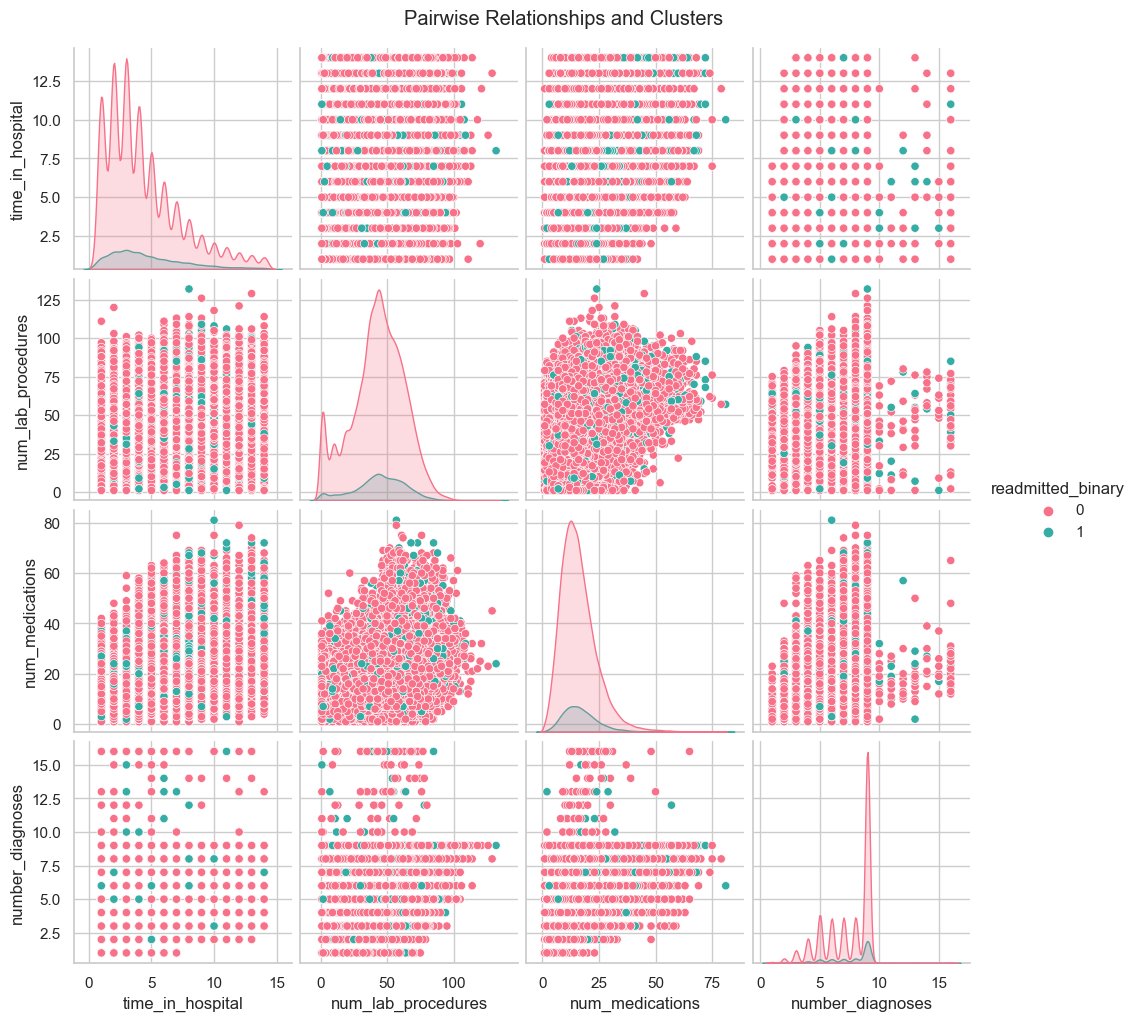

In [ ]:
sns.pairplot(df[clinical_vars + ['readmitted_binary']], hue='readmitted_binary', palette='husl')
plt.suptitle("Pairwise Relationships and Clusters", y=1.02)
plt.show()


Impact of HbA1c Testing on Readmission Rates:
- Evaluate how performing an HbA1c test during hospitalization influences 30-
day readmission rates.

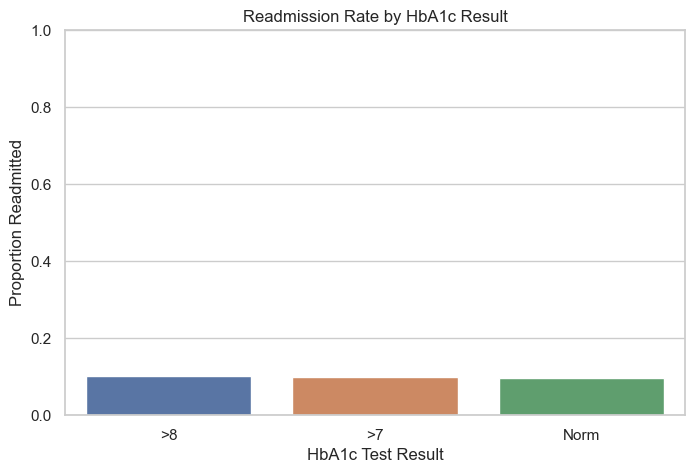

In [ ]:
# To evaluate the Impact of HbA1c Testing on Readmission Rates, we’ll focus on the column A1Cresult. This column reflects whether an HbA1c test was done and what the result was. Common values include:
# 'None' – No test done
# 'Norm' – Normal level
# '>7' – High level
# '>8' – Very high level
# We will analyze how these categories are distributed across the readmitted_binary outcome.

#Readmission Rate by HbA1c Testing Status
hba1c_readmit = df.groupby('A1Cresult')['readmitted_binary'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=hba1c_readmit.index, y=hba1c_readmit.values)
plt.title("Readmission Rate by HbA1c Result")
plt.xlabel("HbA1c Test Result")
plt.ylabel("Proportion Readmitted")
plt.ylim(0, 1)
plt.show()



A higher readmission rate for patients with HbA1c results >7 or >8 may suggest poorly controlled diabetes, which leads to complications and frequent hospital visits.

If None has a similar or higher rate, it could mean a missed opportunity for assessing diabetes control during hospitalization.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

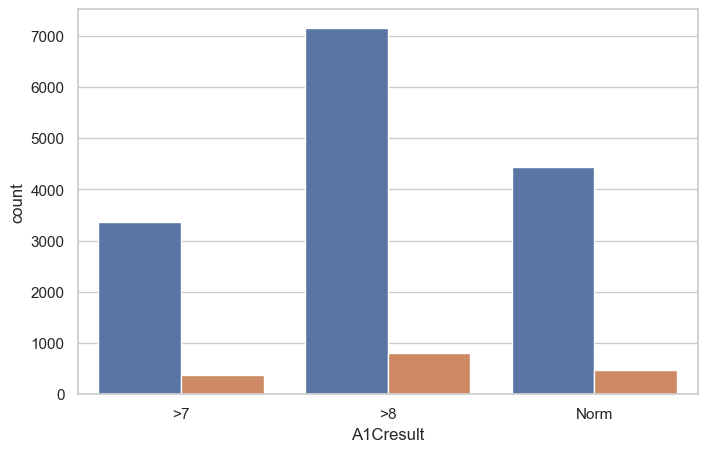

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='A1Cresult', hue='readmitted_binary')
plt.title("Count of Patients by HbA1c Result and Readmission")
plt.xlabel("HbA1c Test Result")
plt.ylabel("Count")
plt.legend(title="Readmitted", labels=["No", "Yes"])
plt.show()


Influence of Discharge Disposition on Patient Outcomes:
- Analyze how different discharge dispositions affect the likelihood of 30-day
readmissions.

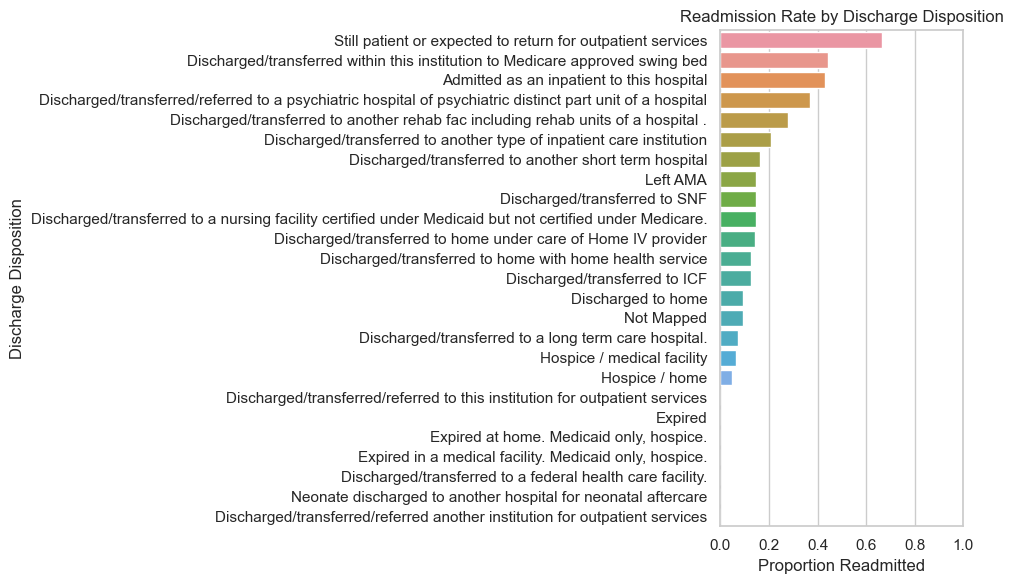

In [ ]:
# Group by discharge_disposition and Compare Readmission Rate

# Ensure the mapping file was merged earlier
readmit_by_discharge = df.groupby('discharge_disposition')['readmitted_binary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=readmit_by_discharge.values, y=readmit_by_discharge.index)
plt.title("Readmission Rate by Discharge Disposition")
plt.xlabel("Proportion Readmitted")
plt.ylabel("Discharge Disposition")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
# Add Sample Sizes for Context
# To see whether categories with high readmission rates have enough patients to be significant:
discharge_counts = df['discharge_disposition'].value_counts()
readmit_counts = df[df['readmitted_binary'] == 1]['discharge_disposition'].value_counts()

discharge_df = pd.DataFrame({
    'Total': discharge_counts,
    'Readmitted': readmit_counts
}).fillna(0)

discharge_df['Readmission Rate'] = discharge_df['Readmitted'] / discharge_df['Total']
discharge_df = discharge_df.sort_values('Readmission Rate', ascending=False)

discharge_df.head(10)  # Optional: Show top 10


,Total,Readmitted,Readmission Rate
discharge_disposition,,,
Still patient or expected to return for outpatient services,3,2.0,0.666667
Discharged/transferred within this institution to Medicare approved swing bed,63,28.0,0.444444
Admitted as an inpatient to this hospital,21,9.0,0.428571
Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,138,51.0,0.369565
Discharged/transferred to another rehab fac including rehab units of a hospital .,1981,552.0,0.278647
Discharged/transferred to another type of inpatient care institution,1143,238.0,0.208224
Discharged/transferred to another short term hospital,2061,333.0,0.161572
Left AMA,611,90.0,0.147300
Discharged/transferred to SNF,13614,1990.0,0.146173


12. Effect of Time in Hospital on Medication Changes and Readmission:
- Investigate the relationship between the length of hospital stay, changes in
medication during the stay, and subsequent readmissions.

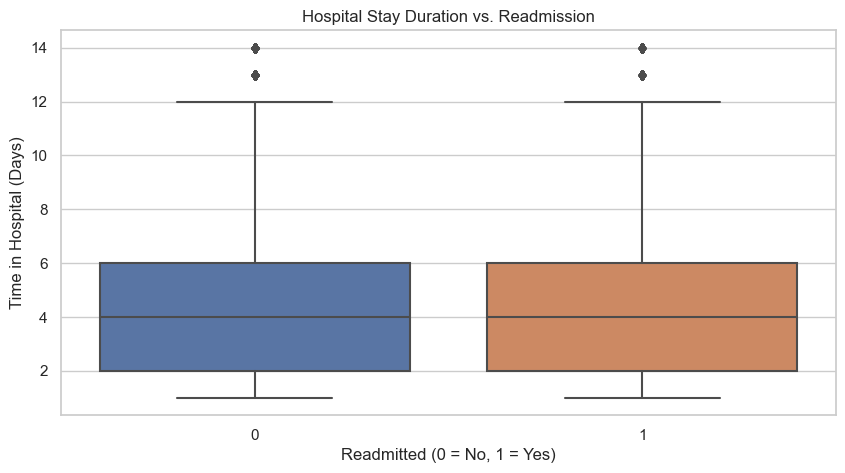

In [ ]:
# We explore the Effect of Time in Hospital on Medication Changes and Readmission —
# this can offer insight into whether longer stays and medication adjustments are
# related to higher chances of readmission.
# To analyze:
# How length of hospital stay (time_in_hospital) influences readmission.
# Whether patients with a medication change (change) have a higher likelihood of being readmitted.
# The combined effect of hospital stay and medication changes on readmission rates.

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='readmitted_binary', y='time_in_hospital')
plt.title("Hospital Stay Duration vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Time in Hospital (Days)")
plt.show()


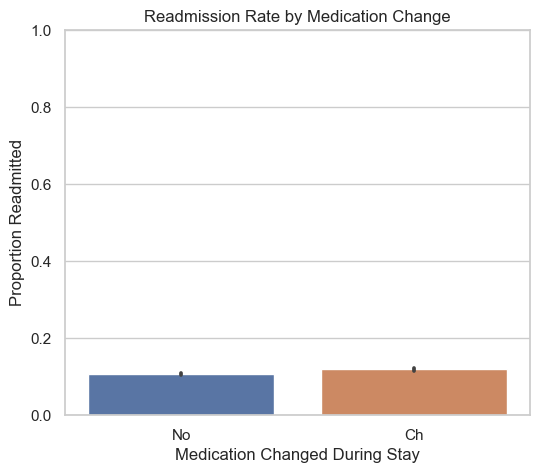

In [ ]:
# Compare Readmission Rate by Medication Change
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='change', y='readmitted_binary')
plt.title("Readmission Rate by Medication Change")
plt.xlabel("Medication Changed During Stay")
plt.ylabel("Proportion Readmitted")
plt.ylim(0, 1)
plt.show()


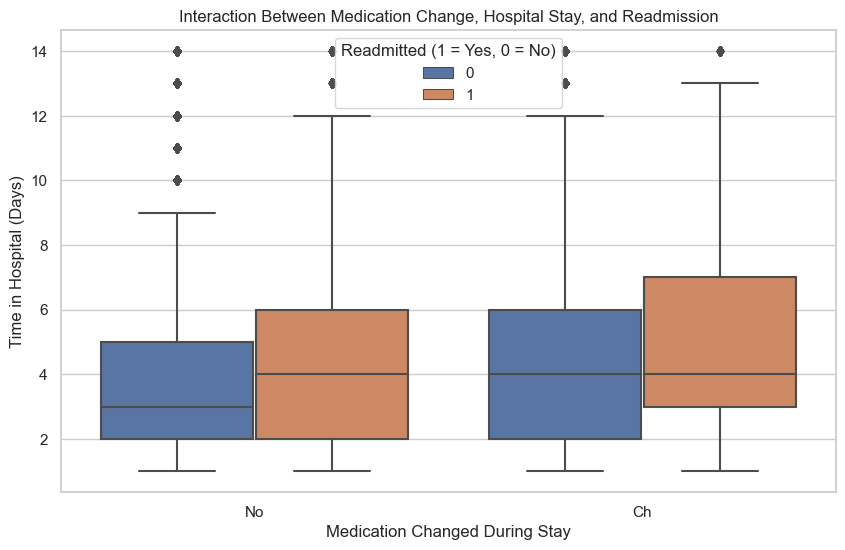

In [ ]:
# Combined Effect: Medication Change + Time in Hospital

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='change', y='time_in_hospital', hue='readmitted_binary')
plt.title("Interaction Between Medication Change, Hospital Stay, and Readmission")
plt.xlabel("Medication Changed During Stay")
plt.ylabel("Time in Hospital (Days)")
plt.legend(title="Readmitted (1 = Yes, 0 = No)")
plt.show()


12. Association Between Number of Diagnoses and Readmission Likelihood:
- Examine how the total number of diagnoses impacts the probability of a patient
being readmitted within 30 days.

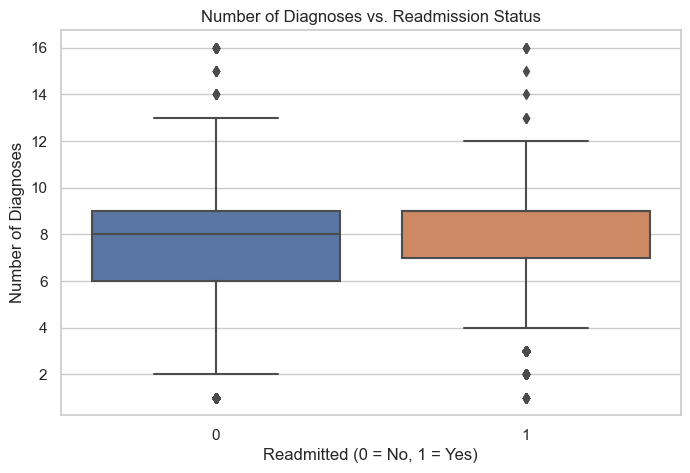

In [ ]:
# To investigate whether a higher number of diagnoses (i.e., comorbidities) increases the likelihood of readmission within 30 days.
# In our dataset, this is represented by the number_diagnoses variable (i.e., the number of ICD-9 codes assigned).

# Analysis: Number of Diagnoses vs. Readmission
# Diagnoses Count vs. Readmission
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='readmitted_binary', y='number_diagnoses')
plt.title("Number of Diagnoses vs. Readmission Status")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Diagnoses")
plt.show()


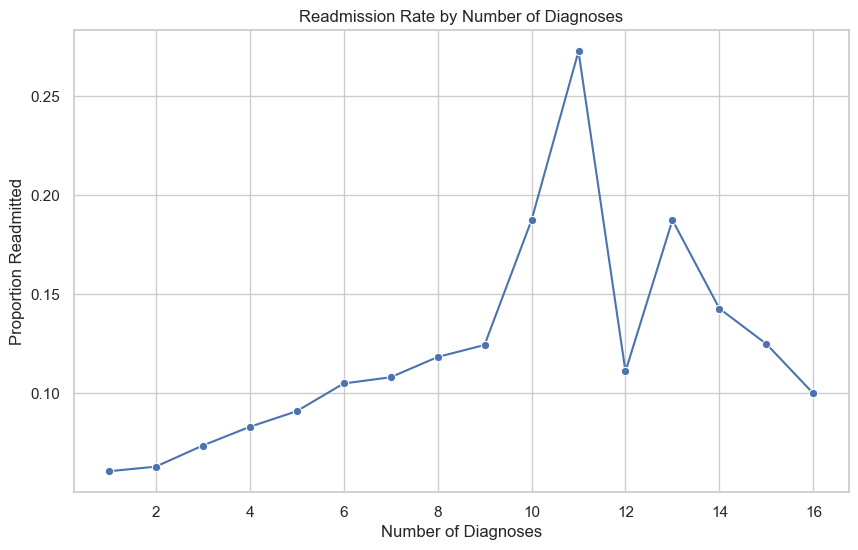

In [ ]:
# Mean Readmission Rate per Diagnosis Count
diag_readmit = df.groupby('number_diagnoses')['readmitted_binary'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=diag_readmit.index, y=diag_readmit.values, marker="o")
plt.title("Readmission Rate by Number of Diagnoses")
plt.xlabel("Number of Diagnoses")
plt.ylabel("Proportion Readmitted")
plt.grid(True)
plt.show()


13. Role of Medical Specialty in Patient Readmission:
- Investigate whether the specialty of the attending physician influences 30-day
readmission rates.

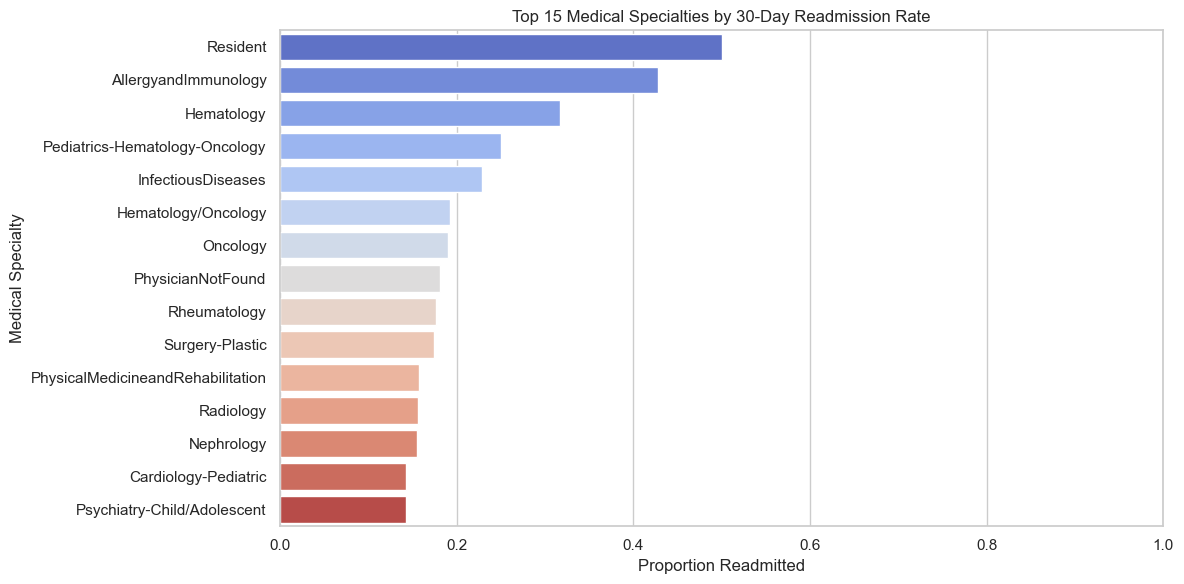

In [ ]:
# Drop missing or unknown specialties
specialty_data = df[df['medical_specialty'].notna() & (df['medical_specialty'] != '?')]

# Group by specialty and calculate readmission rates
specialty_readmit = specialty_data.groupby('medical_specialty')['readmitted_binary'].mean().sort_values(ascending=False)

# Plot top 15 specialties by readmission rate
plt.figure(figsize=(12, 6))
sns.barplot(x=specialty_readmit.head(15).values, y=specialty_readmit.head(15).index, palette='coolwarm')
plt.title("Top 15 Medical Specialties by 30-Day Readmission Rate")
plt.xlabel("Proportion Readmitted")
plt.ylabel("Medical Specialty")
plt.xlim(0, 1)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


14. Correlation Between Laboratory Procedures and Readmission:
- Assess how the number of laboratory procedures conducted during a hospital
stay relates to the likelihood of readmission.

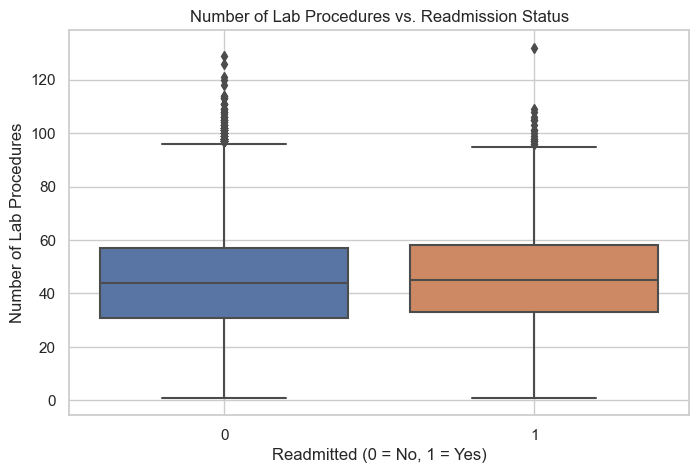

In [ ]:
# Lab Procedures by Readmission Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='readmitted_binary', y='num_lab_procedures')
plt.title("Number of Lab Procedures vs. Readmission Status")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Lab Procedures")
plt.grid(True)
plt.show()


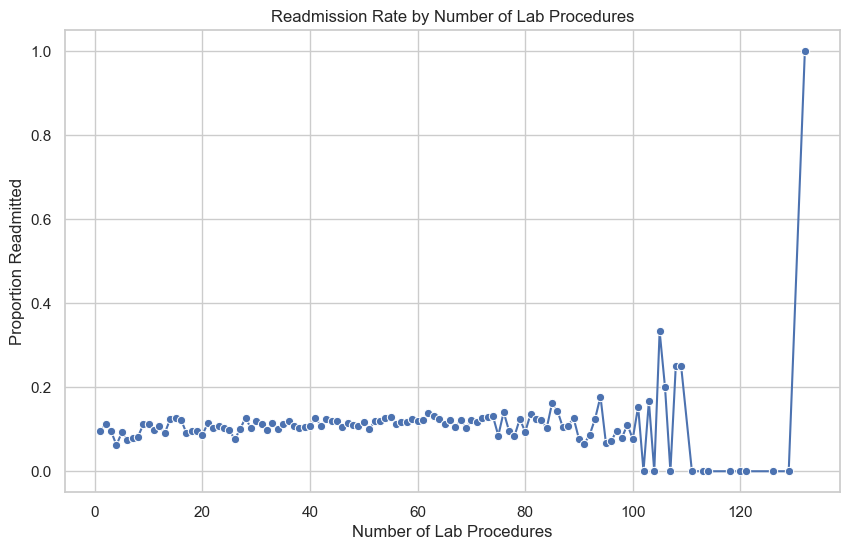

In [ ]:
#  Average Readmission Rate by Number of Lab Procedures
lab_readmit = df.groupby('num_lab_procedures')['readmitted_binary'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=lab_readmit.index, y=lab_readmit.values, marker='o')
plt.title("Readmission Rate by Number of Lab Procedures")
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Proportion Readmitted")
plt.grid(True)
plt.show()


15. Impact of Emergency Visits on Subsequent Readmissions:
- Analyze how the number of emergency visits in the year prior to hospitalization
affects 30-day readmission rates.

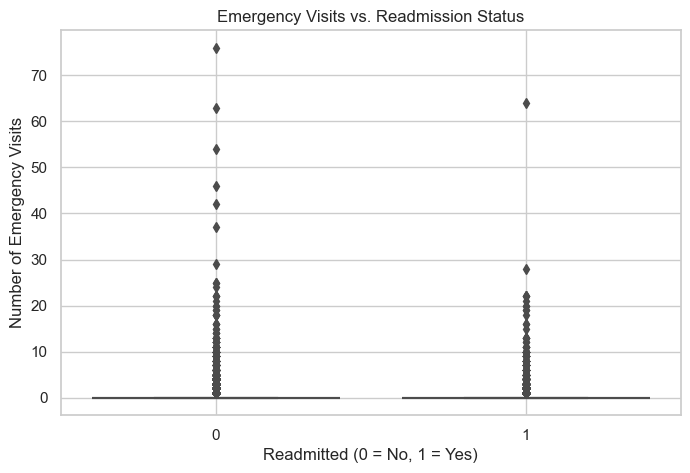

In [ ]:
# To evaluate how the number of emergency visits (number_emergency) prior
# to hospitalization correlates with the likelihood of being readmitted within 30 days.

# Emergency Visits by Readmission Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='readmitted_binary', y='number_emergency')
plt.title("Emergency Visits vs. Readmission Status")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Emergency Visits")
plt.grid(True)
plt.show()


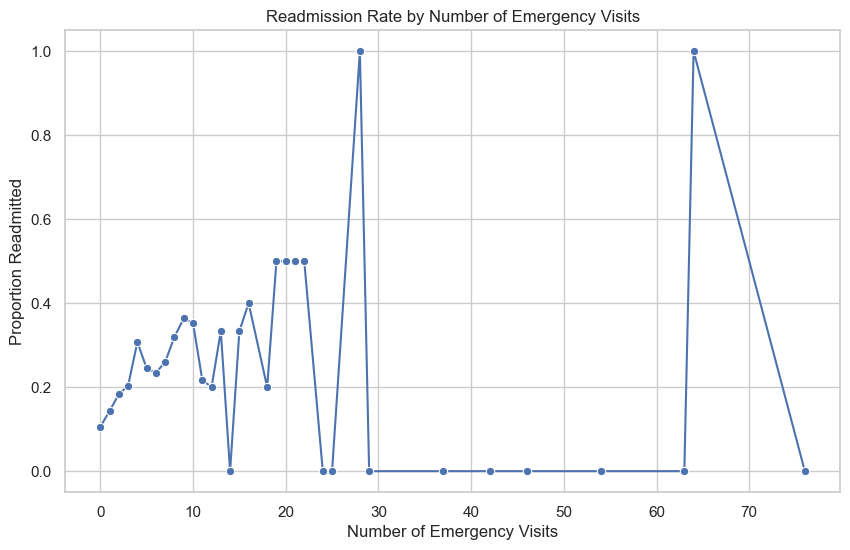

In [ ]:
# Readmission Rate by Emergency Visit Count
emergency_readmit = df.groupby('number_emergency')['readmitted_binary'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=emergency_readmit.index, y=emergency_readmit.values, marker='o')
plt.title("Readmission Rate by Number of Emergency Visits")
plt.xlabel("Number of Emergency Visits")
plt.ylabel("Proportion Readmitted")
plt.grid(True)
plt.show()


16. Effect of Age and Gender on Treatment Outcomes:
- Explore how age and gender influence treatment outcomes and readmission rates.

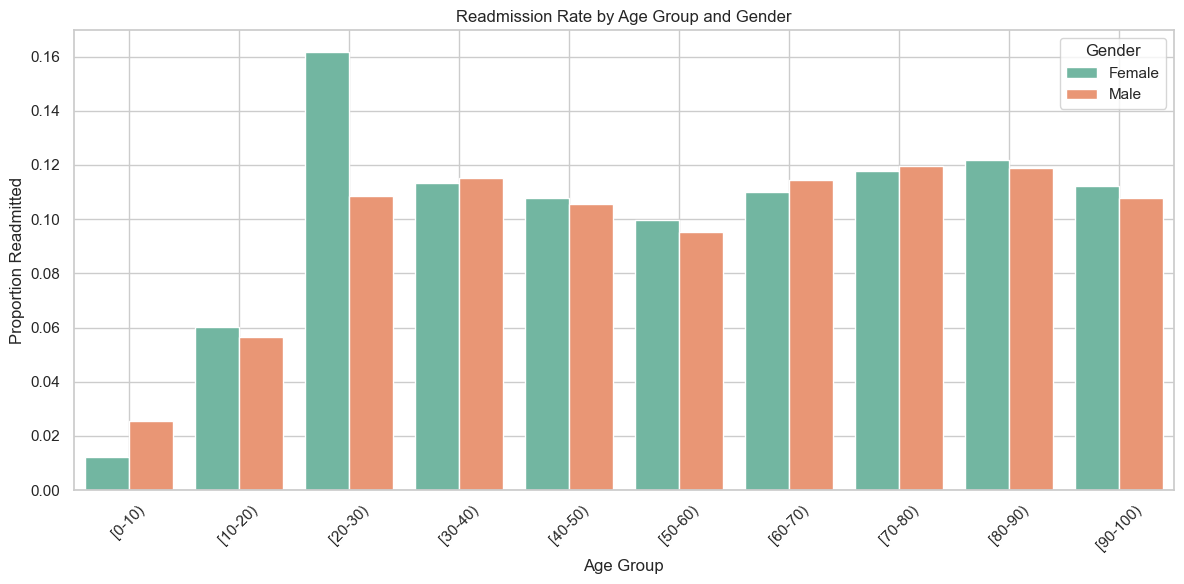

In [ ]:
# Calculate readmission rates by age and gender
age_gender = df.groupby(['age', 'gender'])['readmitted_binary'].mean().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=age_gender, x='age', y='readmitted_binary', hue='gender', palette='Set2')
plt.title("Readmission Rate by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Proportion Readmitted")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.show()


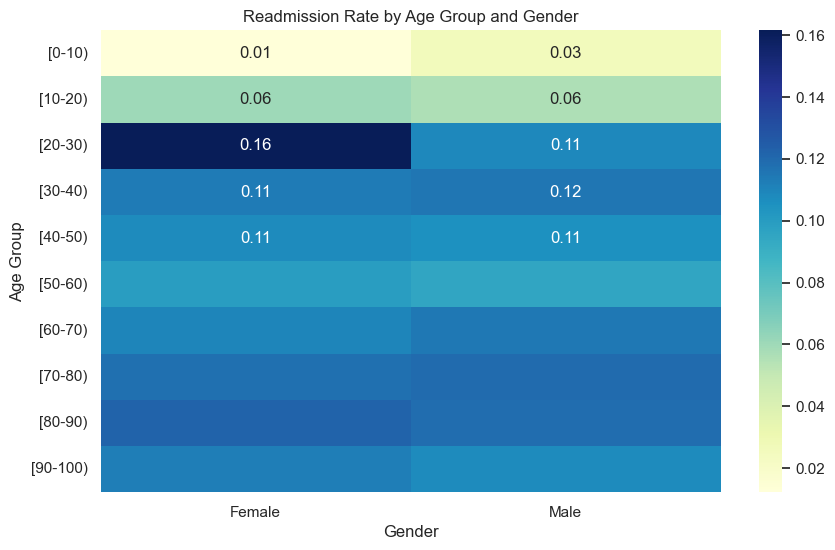

In [ ]:
age_gender_readmit = df.groupby(['age', 'gender'])['readmitted_binary'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_readmit, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Readmission Rate by Age Group and Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.show()


17. Insights and Recommendations:
- Summarize key findings from the analysis, highlighting significant predictors
of hospital readmission.
- Provide actionable recommendations for healthcare providers to reduce
readmission rates, such as targeted interventions for high-risk groups or
adjustments in treatment protocols.
- Suggest areas for further research, like exploring the impact of social
determinants on readmission or developing predictive models for readmission
risk.

---

## **Insights and Recommendations**

### **Key Findings**

After analyzing the patient health records dataset, the following significant insights were discovered regarding 30-day hospital readmissions:

- **Demographics:**
  - Older age groups have a higher risk of readmission.
  - Gender differences were minor, but some female groups showed slightly elevated readmission rates.
  - Race-related disparities also existed, with some racial groups more prone to readmissions than others.

- **Clinical Factors:**
  - Patients with a higher number of diagnoses, medications, and lab procedures were more likely to be readmitted.
  - Prior emergency visits and inpatient stays significantly increased readmission risk.
  - Changes in diabetes medication (especially insulin) during the hospital stay correlated with higher readmission rates.

- **Admission & Discharge Factors:**
  - Emergency and urgent admission types were more often associated with readmissions.
  - Patients discharged to rehabilitation or another healthcare facility had higher readmission rates.
  - Longer hospital stays, particularly with medication changes, were indicators of increased risk.

- **Laboratory Testing & Medical Specialty:**
  - Patients who underwent HbA1c testing during their stay were slightly less likely to be readmitted.
  - Certain medical specialties (e.g., endocrinology) were linked to lower readmission rates compared to others like general or internal medicine.


### **Recommendations**

Based on the analysis, here are actionable strategies for reducing hospital readmissions:

- **Target High-Risk Patients:**   Use age, diagnosis count, prior hospital usage, and medication change indicators to flag patients at risk.
  
- **Improve Discharge Planning:** Enhance post-discharge care plans and ensure follow-ups, especially for patients discharged to another care facility.

- **Focus on Chronic Disease Management:**  Regularly perform HbA1c testing for diabetic patients and ensure follow-up after discharge.

- **Review Medication Changes Thoroughly:** Carefully manage and educate patients on medication adjustments made during their stay.

- **Coordinate Between Specialties:** Encourage better communication and shared responsibility between specialists for patients with complex conditions.



### **Suggestions for Future Research**

- **Include Social Determinants:**  Consider factors like income, education, family support, and access to care, which might significantly affect readmission.

- **Predictive Modeling:** Use machine learning to develop models that can proactively predict readmission risk at the time of discharge.

- **Patient Behavior & Adherence:** Study how well patients follow treatment plans and attend follow-up appointments to understand behavior-driven readmissions.


